<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/searches_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# For Google Colab:
!pip install kats
!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from imp import reload
from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
reload(logging)


<module 'logging' from '/usr/lib/python3.7/logging/__init__.py'>

In [3]:
uk = pd.read_csv("UK.csv")
uk = uk.rename(columns={'date':'time'})       # ts implica 'time'
print(uk.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      40 non-null     object
 1   year      40 non-null     int64 
 2   month     40 non-null     int64 
 3   sessions  40 non-null     int64 
 4   searches  40 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB
None


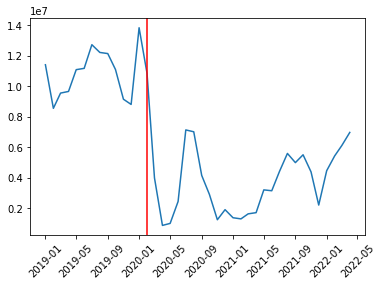

In [4]:
# import packages
from kats.detectors.cusum_detection import CUSUMDetector

tsd = TimeSeriesData(uk.loc[:,['time','searches']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [5]:
print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999999999297, direction: decrease, index: 13, delta: -7216182.236263737, regression_detected: True, stable_changepoint: True, mu0: 10869213.92857143, mu1: 3653031.6923076925, llr: 60.57133142276169, llr_int: inf, p_value: 7.027711745877241e-14, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999999999297
direction = decrease
cp_index = 13
mu0 = 10869213.92857143
mu1 = 3653031.6923076925
delta = -7216182.236263737
llr_int = inf
llr = 60.57133142276169
regression_detected = True
stable_changepoint = True
p_value = 7.027711745877241e-14
p_value_int = nan
